In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import sys
sys.path.append(sys.path[0] + '/../')
import stochasticgrowth_eventline as sge

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [3]:
pop = sge.Population(inheritancematrix = [[.9,1],[0,.5]])
pop.growth(divisionevents = 1000)

pdata = pop.data


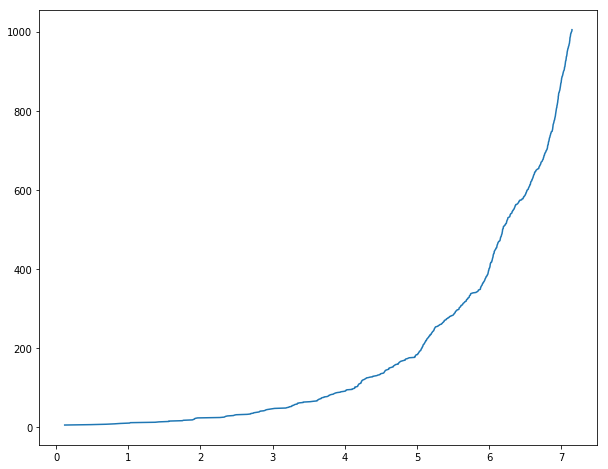

In [4]:
plt.plot(pdata['time'],pdata['#populationsize'])

In [10]:
#lineagedata = list()
#for i in range(1000):
#    lineagedata.append(pop.events.LineageData(ID = i))
#    print(i)

currentpop = pop.events.CurrentPopulationData()
founderpop = pop.events.FounderPopulationData()

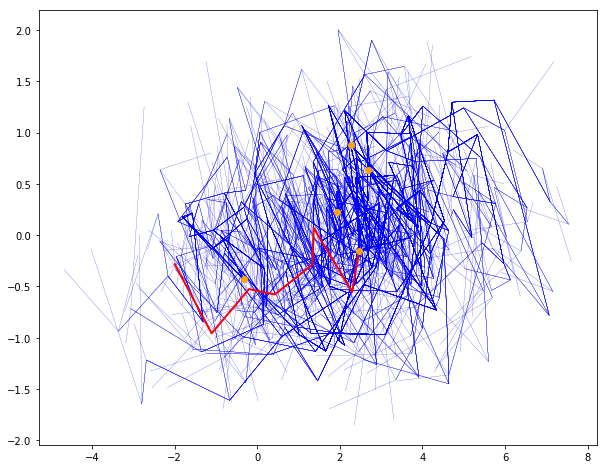

In [13]:
for ld in lineagedata:
    plt.plot(ld['parentstate0'],ld['parentstate1'], linewidth = .2, c = 'blue', zorder = 1)

plt.plot(ld['parentstate0'],ld['parentstate1'], linewidth = 2, c = 'red', zorder = 2)
plt.scatter(founderpop['parentstate0'],founderpop['parentstate1'], marker = 'o', c = 'orange', zorder = 100)

In [12]:
print(founderpop)

   ID      time  parentID  parentstate0  parentstate1
0   4  0.120220        -1      2.263566      0.875267
1   0  0.480343        -1      2.460978     -0.152823
2   2  0.693012        -1      2.678632      0.637761
3   1  0.809187        -1      1.932655      0.229348
4   3  0.888984        -1     -0.333434     -0.425342


In [30]:
def matrix(a,b,c,d):
    return np.array([[a,b],[c,d]],dtype = np.float)

@interact
def matrixPlot(startangle = (0,1,.125),a = (.1,1,.1), b=(-3,3,.1), c = (-3,3,.1), d = (-2,3,.1)):
    def plotVector(x, c = 'red'):
        plt.plot([0,x[0]],[0,x[1]], marker = 'o', linewidth = 4, c = c)
    
    m = matrix(a,b,c,d)
    x = np.array([-np.sin(2 * np.pi * startangle),np.cos(2 * np.pi * startangle)])
    y = np.dot(m,x)
    
    plotVector(x, c = 'red')
    plotVector(y, c = 'green')

    eigval,eigvec = np.linalg.eig(m)
    
    plotVector(eigval[0] * eigvec[0]/np.linalg.norm(eigvec[0]), c = 'blue')
    plotVector(eigval[1] * eigvec[1]/np.linalg.norm(eigvec[1]), c = 'blue')
    
    plt.ylim((-1.1,1.1))
    plt.xlim((-1.1,1.1))
    
    plt.legend(['x = ({:.3f};{:.3f})'.format(*x),'y = ({:.3f};{:.3f})'.format(*y)])

interactive(children=(FloatSlider(value=0.0, description='startangle', max=1.0, step=0.125), FloatSlider(value…

In [26]:
np.linalg.eig(matrix(.6,1,0,.4))

(array([0.6, 0.4]), array([[ 1.        , -0.98058068],
        [ 0.        ,  0.19611614]]))